## Hamoye ML Project Electric Cars - Team Prophet

## Data scrapped from Web - by Team 1

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Web Scrapping of Data

In [5]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from selenium.webdriver.chrome.options import Options

car_name = []
car_model = []
car_battery = []
car_seats = []
car_acceleration = []
car_speed = []
car_distance = []
car_eff = []
car_charge = []
price_g = []
price_n = []
price_p = []


option = Options()
option.headless = True
browser = webdriver.Chrome(ChromeDriverManager().install())
url = 'https://ev-database.org/'
browser.get(url)
time.sleep(10)
browser.find_element_by_xpath('//div[@id="paging"]').click()
browser.find_element_by_xpath('//*[@id="paging"]/ul/li[4]').click()
time.sleep(20)
car_list = browser.find_elements_by_xpath('//div[@class="data-wrapper"]')
for names in car_list:
    name = names.find_element_by_xpath('.//a[@class="title"]/span').text
    car_name.append(name)
    model = names.find_element_by_xpath('.//a[@class="title"]/span[2]').text
    car_model.append(model)
    battery = names.find_element_by_xpath('.//div[@class="subtitle"]/span').text.split(' ')[0]
    car_battery.append(battery)
    seats = names.find_element_by_xpath('.//div[@class="icons"]/span[6]').text
    car_seats.append(seats)
    acceleration = names.find_element_by_xpath('.//div[@class="specs"]/p/span[2]').text.split(' ')[0]
    car_acceleration.append(acceleration)
    speed = names.find_element_by_xpath('.//div[@class="specs"]/p[2]/span[2]').text.split(' ')[0]
    car_speed.append(speed)
    distance = names.find_element_by_xpath('.//div[@class="specs"]/p[3]/span[2]').text.split(' ')[0]
    car_distance.append(distance)
    efficiency = names.find_element_by_xpath('.//div[@class="specs"]/p[4]/span[2]').text.split(' ')[0]
    car_eff.append(efficiency)
    fast_charge = names.find_element_by_xpath('.//div[@class="specs"]/p[5]/span[2]').text.split(' ')[0]
    car_charge.append(fast_charge)
    price_gbp = names.find_element_by_xpath('.//div[@class="pricing align-right"]/span[3]').text[1:]
    price_p.append(price_gbp)
    price_germany = names.find_element_by_xpath('.//div[@class="pricing align-right"]/span[1]').text[1:]
    price_g.append(price_germany)
    price_netherland = names.find_element_by_xpath('.//div[@class="pricing align-right"]/span[2]').text[1:]
    price_n.append(price_netherland)

# saving the data into a dictionary and then turning it into a csv file
car_data = {'vehicle_name':car_name,'model':car_model,'battery':car_battery,'seats':car_seats,
            'acceleration':car_acceleration,'top_speed':car_speed,'distance':car_distance,'efficiency':car_eff,
            'fast_charge':car_charge,'price_pounds':price_p,'price_germany':price_g,'price_netherland':price_n}
# print(car_data)
car_df = pd.DataFrame().from_dict(car_data)



====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
Driver [C:\Users\krane\.wdm\drivers\chromedriver\win32\92.0.4515.107\chromedriver.exe] found in cache


In [6]:
# Check the dataframe
car_df.head()

vehicle_name                            model battery seats acceleration  \
0      Renault         Megane E-Tech EV60 220hp      60     5          7.4   
1        Tesla  Model 3 Standard Range Plus LFP    52.5     5          5.6   
2          Kia                           EV6 GT    77.4     5          3.5   
3        Tesla    Model Y Long Range Dual Motor      70     7          5.0   
4     Mercedes                   EQS 580 4MATIC   107.8     5          4.3   

  top_speed distance efficiency fast_charge price_pounds price_germany  \
0       160      360        167         520      £35,000       €40,000   
1       225      350        150         630       40,990        43,560   
2       260      395        196         920       58,295        65,990   
3       217      410        171         590      £54,000        59,965   
4       210      610        177         800     £115,000       135,529   

  price_netherland  
0          €40,000  
1           49,990  
2           63,595  
3           65,010  
4          154,949

In [7]:
# Export the dataframe to CSV file, for later quick reference
car_df.to_csv('D:\People\Amit\Hamoye\project\\electric_cars.csv')

## Data Cleaning and Treatment by Team 2 and 3

In [10]:
# Read/Load the dataset from local CSV file
# Writing index_col=0 doesn't add additional column 'Unnamed: 0', while importing data from CSV File
df = pd.read_csv('D:\People\Amit\Hamoye\project\\electric_cars.csv', index_col=0)

In [11]:
# check the dataframe
df.head()

vehicle_name                            model  battery  seats  acceleration  \
0      Renault         Megane E-Tech EV60 220hp     60.0      5           7.4   
1        Tesla  Model 3 Standard Range Plus LFP     52.5      5           5.6   
2          Kia                           EV6 GT     77.4      5           3.5   
3        Tesla    Model Y Long Range Dual Motor     70.0      7           5.0   
4     Mercedes                   EQS 580 4MATIC    107.8      5           4.3   

   top_speed  distance  efficiency fast_charge price_pounds price_germany  \
0        160       360         167         520      £35,000       €40,000   
1        225       350         150         630       40,990        43,560   
2        260       395         196         920       58,295        65,990   
3        217       410         171         590      £54,000        59,965   
4        210       610         177         800     £115,000       135,529   

  price_netherland  
0          €40,000  
1           49,990  
2           63,595  
3           65,010  
4          154,949

In [12]:
# check the data-types
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge          object
price_pounds         object
price_germany        object
price_netherland     object
dtype: object

#### Here, apart from vehicle_name and model all other columns should be numeric, lets convert them to Numeric types.

In [15]:
df = df.astype({'fast_charge': np.int})

ValueError: invalid literal for int() with base 10: '-'

#### Observe that fast-charge is not converting to int type because of string value '-'
#### Let us find and replace it

In [16]:
# Find '-' in dataset
df[df.isin(['-'])].stack()

69   fast_charge    -
113  fast_charge    -
128  fast_charge    -
142  fast_charge    -
168  fast_charge    -
dtype: object

#### Its present only in fast-charge column

In [17]:
# Replace string '-' with Null Value
df['fast_charge']=df['fast_charge'].replace(to_replace='-', value=np.NaN)

In [20]:
# Check Null values
df['fast_charge'].isnull().sum()

5

In [21]:
# Replace Null values with Median values
df['fast_charge'] = df['fast_charge'].fillna(df['fast_charge'].median())

In [22]:
# re-check Null values
df['fast_charge'].isnull().sum()

0

In [25]:
# Now convert fast-charge to Numeric type 
df = df.astype({'fast_charge': np.int})

In [26]:
#Check data-types
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds         object
price_germany        object
price_netherland     object
dtype: object

#### Let us convert price_pounds, price_germany and price_netherland to Numeric types

In [27]:
df = df.astype({'price_pounds': np.int})

ValueError: invalid literal for int() with base 10: ' £35,000'

#### Its not getting converted, we need to clean it first

In [38]:
#Cleaning comma(,), curency symbols(£,€), and replacing N/A(/A) values with Null(NaN).
df['price_pounds'] = df['price_pounds'].str.replace(',', '')
df['price_pounds'] = df['price_pounds'].str.replace('£', '')
df['price_pounds'] = df['price_pounds'].str.replace('€', '')
df['price_pounds'] = df['price_pounds'].str.replace('/A', '')
df['price_pounds'] = df['price_pounds'].replace(to_replace='', value=np.NaN)

In [39]:
#Check its Null values
df['price_pounds'].isnull().sum()

45

In [40]:
#Check its dtype
df['price_pounds'].dtype

dtype('O')

In [42]:
#Convert it into numeric type
df = df.astype({'price_pounds': np.float32})

In [44]:
# Check its dtype again
df['price_pounds'].dtype

dtype('float32')

#### Now we do similar cleaning for price_germany and price_netherland

In [45]:
#Cleaning comma(,), curency symbols(£,€), and replacing N/A(/A) values with Null(NaN).
df['price_germany'] = df['price_germany'].str.replace(',', '')
df['price_germany'] = df['price_germany'].str.replace('£', '')
df['price_germany'] = df['price_germany'].str.replace('€', '')
df['price_germany'] = df['price_germany'].str.replace('/A', '')
df['price_germany'] = df['price_germany'].replace(to_replace='', value=np.NaN)
#Converting it to Numric data-type
df = df.astype({'price_germany': np.float32})

In [49]:
#Cleaning comma(,), curency symbols(£,€), and replacing N/A(/A) values with Null(NaN).
df['price_netherland'] = df['price_netherland'].str.replace(',', '')
df['price_netherland'] = df['price_netherland'].str.replace('£', '')
df['price_netherland'] = df['price_netherland'].str.replace('€', '')
df['price_netherland'] = df['price_netherland'].str.replace('/A', '')
df['price_netherland'] = df['price_netherland'].replace(to_replace='', value=np.NaN)
#Converting it to Numric data-type
df = df.astype({'price_netherland': np.float32})

In [50]:
#Check overall data-type
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds        float32
price_germany       float32
price_netherland    float32
dtype: object

In [51]:
#check dataset
df.head()

vehicle_name                            model  battery  seats  acceleration  \
0      Renault         Megane E-Tech EV60 220hp     60.0      5           7.4   
1        Tesla  Model 3 Standard Range Plus LFP     52.5      5           5.6   
2          Kia                           EV6 GT     77.4      5           3.5   
3        Tesla    Model Y Long Range Dual Motor     70.0      7           5.0   
4     Mercedes                   EQS 580 4MATIC    107.8      5           4.3   

   top_speed  distance  efficiency  fast_charge  price_pounds  price_germany  \
0        160       360         167          520       35000.0        40000.0   
1        225       350         150          630       40990.0        43560.0   
2        260       395         196          920       58295.0        65990.0   
3        217       410         171          590       54000.0        59965.0   
4        210       610         177          800      115000.0       135529.0   

   price_netherland  
0           40000.0  
1           49990.0  
2           63595.0  
3           65010.0  
4          154949.0

In [52]:
#Check Null values
df.isnull().sum()

vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        45
price_germany       13
price_netherland    25
dtype: int64

#### The three price columns have Null values, and price_germany has least Null Values. It is suggested that instead of keeping prices in three different currencies, we can convert the price to universal currency USD value. But before that we will see it price_germany has any outliers.

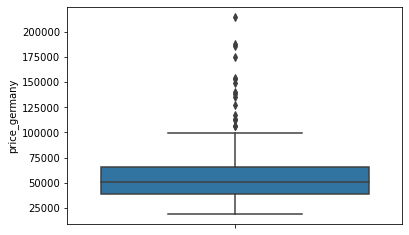

In [55]:
#Plot the price_germany using box-plot to visualize Outliers
sns.boxplot(x='price_germany',data=df,orient='v')

#### We observe many outliers on the upper side. 

In [57]:
#Lets see how to get the outliers
Q1 = df['price_germany'].quantile(0.25) #First Quantile
Q3 = df['price_germany'].quantile(0.75) # Third Quantile
IQR = Q3 - Q1 #Interquantile Range

#### Upper side Outliers are Q3+1.5(IQR)
#### Lower side Outliers are Q1-1.5(IQR)

In [59]:
## storing index locations of upper and lower outliers
index_upper = df[df['price_germany'] >= (Q3+1.5*IQR)].index
index_lower = df[df['price_germany'] <= (Q1-1.5*IQR)].index

In [60]:
# Check upper outliers
df.iloc[index_upper]

vehicle_name                         model  battery  seats  acceleration  \
4       Mercedes                EQS 580 4MATIC    107.8      5           4.3   
14      Mercedes                      EQS 450+    107.8      5           6.2   
17          Audi                  e-tron GT RS     85.0      4           3.3   
25         Tesla                 Model S Plaid     90.0      5           2.1   
37       Porsche                Taycan Turbo S     83.7      4           2.8   
49     Lightyear                           One     60.0      5          10.0   
78         Tesla                      Roadster    200.0      4           2.1   
84         Lucid             Air Grand Touring    110.0      5           3.2   
111        Tesla                 Model X Plaid     90.0      7           2.6   
115      Porsche                     Taycan 4S     71.0      4           4.0   
127     Mercedes            EQS AMG 53 4MATIC+    107.8      5           3.4   
141      Porsche  Taycan Turbo S Cross Turismo     83.7      4           2.9   
147      Porsche                Taycan 4S Plus     83.7      4           4.0   
152      Porsche                  Taycan Turbo     83.7      4           3.2   
160      Porsche       Taycan 4S Cross Turismo     83.7      4           4.1   
172      Porsche    Taycan Turbo Cross Turismo     83.7      4           3.3   

     top_speed  distance  efficiency  fast_charge  price_pounds  \
4          210       610         177          800      115000.0   
14         210       640         168          840       95000.0   
17         250       405         210          810      110950.0   
25         322       535         168          800      118980.0   
37         260       390         215          860      138830.0   
49         150       575         104          540           NaN   
78         410       970         206          920      189000.0   
84         270       660         167         1380      125000.0   
111        262       455         198          680      110980.0   
115        250       375         189          750       83580.0   
127        250       565         191          740      135000.0   
141        250       380         220          790      139910.0   
147        250       435         192          910       88193.0   
152        260       400         209          840      115860.0   
160        240       405         207          850       87820.0   
172        250       385         217          800      116950.0   

     price_germany  price_netherland  
4         135529.0          154949.0  
14        106374.0          118891.0  
17        138200.0          146295.0  
25        126990.0          131000.0  
37        186336.0          191700.0  
49        149000.0          149990.0  
78        215000.0          215000.0  
84        140000.0          140000.0  
111       116990.0          121000.0  
115       106487.0          110600.0  
127       175000.0          175000.0  
141       187746.0          193200.0  
147       113008.0          116431.0  
152       153016.0          157900.0  
160       111842.0          116000.0  
172       154444.0          159300.0

In [62]:
# Check lower outlier
df.iloc[index_lower]

Empty DataFrame
Columns: [vehicle_name, model, battery, seats, acceleration, top_speed, distance, efficiency, fast_charge, price_pounds, price_germany, price_netherland]
Index: []

In [65]:
df.iloc[index_upper].count()

vehicle_name        16
model               16
battery             16
seats               16
acceleration        16
top_speed           16
distance            16
efficiency          16
fast_charge         16
price_pounds        15
price_germany       16
price_netherland    16
dtype: int64

In [67]:
#### We have 16 Outliers on Upper side. Dropping outliers from price_germanythem using below code
df.drop(index_upper, inplace=True)
df.drop(index_lower, inplace=True)

In [68]:
#Replacing the Null values with Median values.
df['price_germany'] = df['price_germany'].fillna(df['price_germany'].median())

In [69]:
#Check datset
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds        float32
price_germany       float32
price_netherland    float32
dtype: object

In [70]:
#Check Null values
df.isnull().sum()

vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        44
price_germany        0
price_netherland    25
dtype: int64

In [77]:
#### Now we use price_germany to get prices in USD
df['price_usd'] = round((df['price_germany']/1.18))

In [81]:
#check dataset
df.head()

vehicle_name                            model  battery  seats  acceleration  \
0      Renault         Megane E-Tech EV60 220hp     60.0      5           7.4   
1        Tesla  Model 3 Standard Range Plus LFP     52.5      5           5.6   
2          Kia                           EV6 GT     77.4      5           3.5   
3        Tesla    Model Y Long Range Dual Motor     70.0      7           5.0   
5        Skoda                      Enyaq iV 80     77.0      5           8.6   

   top_speed  distance  efficiency  fast_charge  price_pounds  price_germany  \
0        160       360         167          520       35000.0        40000.0   
1        225       350         150          630       40990.0        43560.0   
2        260       395         196          920       58295.0        65990.0   
3        217       410         171          590       54000.0        59965.0   
5        160       420         183          510       39365.0        43950.0   

   price_netherland  price_usd  
0           40000.0    33898.0  
1           49990.0    36915.0  
2           63595.0    55924.0  
3           65010.0    50818.0  
5           47780.0    37246.0

In [82]:
#check dtypes
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds        float32
price_germany       float32
price_netherland    float32
price_usd           float32
dtype: object

In [83]:
#check Null values
df.isnull().sum()

vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        44
price_germany        0
price_netherland    25
price_usd            0
dtype: int64

## Trying to get some insights from the Data

##### Top 5 Car Brands as per Average values of their Models

In [147]:
# Top 5 Car Brands as per Average values of their EV Car Models
df.groupby('vehicle_name')['price_usd'].mean().sort_values(ascending=False).head(5)

vehicle_name
Porsche    75254.335938
Lucid      74152.500000
Jaguar     65508.000000
Audi       54875.562500
BMW        54770.000000
Name: price_usd, dtype: float32

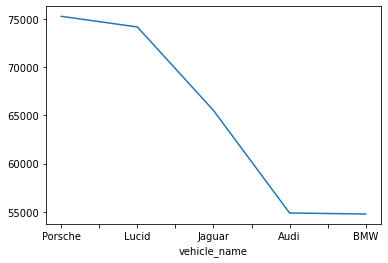

In [157]:
df.groupby('vehicle_name')['price_usd'].mean().sort_values(ascending=False).head(5).plot()
plt.show()

#### Top 5 Car Brands with maximum no. of Models

In [108]:
#### Top 5 Car Brands with maximum no. of Models
df['vehicle_name'].value_counts().head(5)

Audi          16
Tesla         12
Volkswagen    11
Hyundai       10
Kia            9
Name: vehicle_name, dtype: int64

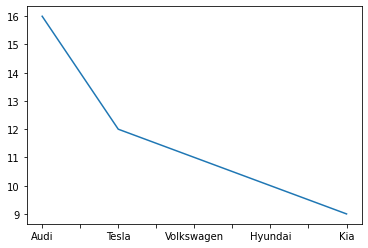

In [156]:
df['vehicle_name'].value_counts().head(5).plot()
plt.show()

#### Top 5 Car Models with Highest Top Speed

In [144]:
df1 = df[['vehicle_name','model','top_speed']]
df1.sort_values('top_speed',ascending=False).head()

vehicle_name                model  top_speed
33         Tesla  Model 3 Performance        261
2            Kia               EV6 GT        260
163        Lucid          Air Touring        250
65         Tesla   Model S Long Range        250
88         Tesla   Model X Long Range        250

#### Top 5 Cars with highest Battery back-up

In [145]:
df2 = df[['vehicle_name','model','battery']]
df2.sort_values('battery',ascending=False).head()

vehicle_name                    model  battery
43         Tesla     Cybertruck Tri Motor    200.0
137        Tesla    Cybertruck Dual Motor    120.0
32           BMW              iX xDrive50    105.2
129        Tesla  Cybertruck Single Motor    100.0
149        Byton        M-Byte 95 kWh 4WD     95.0

#### Distribution of Car prices across the datset

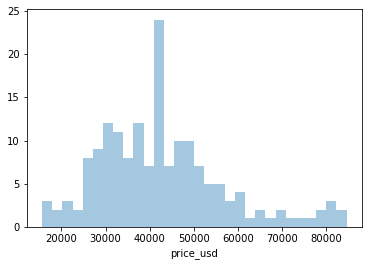

In [163]:
sns.distplot(df['price_usd'],kde=False,bins=30)

#### Correlation among various Features in dataset

In [175]:
features1 = df[['battery', 'seats', 'acceleration', 'top_speed', 'distance', 'efficiency', 'fast_charge', 'price_usd']]

In [177]:
corr = features1.corr()

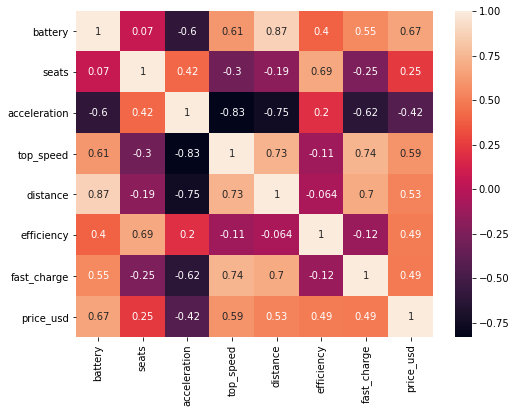

In [181]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)

#### We can see very High correlation between Distance and Battery(0.87). Also, good correlation between Fast-charge and Top speed(0.74).  Also target variable price_usd has a moderate correlation with battery(0.67).

## ...To be Continued